In [113]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np
from descartes import PolygonPatch
from numpy.random import default_rng
rng = default_rng()

In [114]:
import alphashape

In [323]:
points = np.load("FTM_outer.npz")['data'][:,:2]

In [324]:
points

array([[ 5.69705263e+00, -9.59532436e-04],
       [ 5.70765180e+00, -2.83525081e-03],
       [ 5.75497407e+00, -4.73853518e-03],
       ...,
       [ 5.70683311e+00,  9.14235329e-03],
       [ 5.75844160e+00,  5.84774556e-03],
       [ 5.70791562e+00,  5.76255122e-03]])

<IPython.core.display.Javascript object>


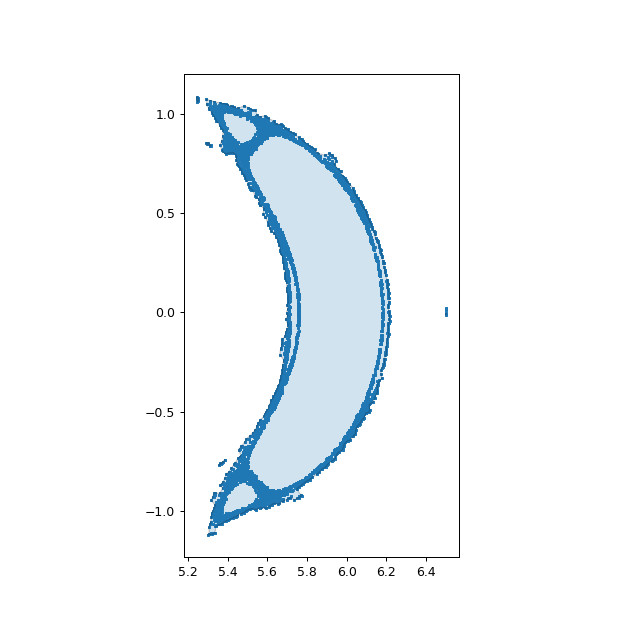

In [329]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(*points.T, s=2)
ax.set_aspect("equal")
alpha_shape = alphashape.alphashape(points, 50)
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))

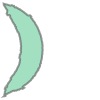

In [330]:
polys = {poly.area: poly for poly in alpha_shape.geoms}
main_shape = polys[sorted(polys, reverse=True)[0]]
main_shape

In [331]:
def multi_smooth(arr, num):
    def smooth(arr):
        padded_arr = np.pad(arr, [(1,1),(0,0)], mode="wrap")
        return 0.5*arr + 0.25*(padded_arr[:-2] + padded_arr[2:])
    
    for i in range(num):
        arr = smooth(arr)
    return arr

In [335]:
bs = 0.02
cut_shapes = main_shape.buffer(-bs).buffer(2*bs).buffer(-bs)

In [333]:
if type(cut_shapes) == type(main_shape):
    cut_shape = cut_shapes
else:
    cut_polys = {poly.area: poly for poly in cut_shapes.geoms}
    cut_shape = cut_polys[sorted(cut_polys, reverse=True)[0]]

<IPython.core.display.Javascript object>


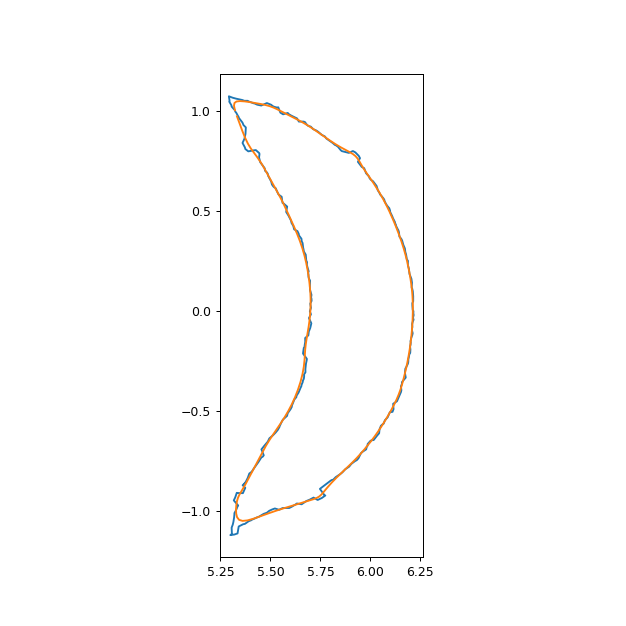

In [334]:
sampled_shape = cut_shape.simplify(0.002)
smooth_coords  = multi_smooth(np.array((sampled_shape.exterior.xy[0], sampled_shape.exterior.xy[1])).T, 10)
smooth_coords2  = multi_smooth(np.array((main_shape.exterior.xy[0], main_shape.exterior.xy[1])).T, 3000)

fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect("equal")
ax.plot(*main_shape.exterior.xy)
# ax.plot(*cut_shape.exterior.xy)
# ax.plot(*sampled_shape.exterior.xy)
ax.plot(*smooth_coords.T)
#ax.plot(*smooth_coords2.T)

In [244]:
coords = np.array((sampled_shape.exterior.xy[0], sampled_shape.exterior.xy[1])).T

In [245]:
coords[:10]

array([[ 5.31962733, -1.01966287],
       [ 5.34403792, -0.9400468 ],
       [ 5.34338736, -0.88981569],
       [ 5.45861448, -0.72332673],
       [ 5.469158  , -0.67133299],
       [ 5.57923745, -0.51937343],
       [ 5.6479432 , -0.3826631 ],
       [ 5.66899863, -0.31603044],
       [ 5.68593205, -0.21704543],
       [ 5.67372877, -0.14423623]])

In [246]:
def smooth(arr):
    padded_arr = np.pad(arr, [(1,1),(0,0)], mode="wrap")
    return 0.5*arr + 0.25*(padded_arr[:-2] + padded_arr[2:])

smooth(coords[:10])

array([[ 5.41425534, -0.78090219],
       [ 5.33777263, -0.94739304],
       [ 5.37235678, -0.86075123],
       [ 5.43244358, -0.75195054],
       [ 5.49404198, -0.64634154],
       [ 5.56889403, -0.52318574],
       [ 5.63603062, -0.40018251],
       [ 5.66796813, -0.30794235],
       [ 5.67864787, -0.22358938],
       [ 5.58825423, -0.38129519]])

<IPython.core.display.Javascript object>


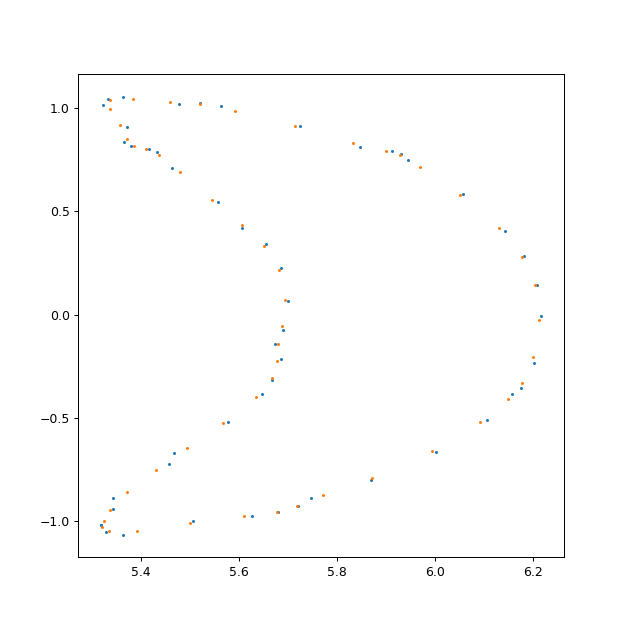

In [247]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(*coords.T, s=2)
ax.scatter(*smooth(coords).T, s=2)